# 2D Shaplet Basis Functions

Author: Alex Broughton<br>Date: 2/7/2014

## 1.0 Introduction
We will visualize the 2D shaplet basis functions defined by Eqn. 8 of Massey & Refregier (2005) in both polar and cartesian coordinates.

$$\chi_{n,m}(r, \theta; \beta) = \frac{(-1)^{(n - |m|)/2}}{\beta^{|m|+1}} \left \{ \frac{[(n-|m|)/2]!}{{\large \pi}[(n+|m|)/2]!} \right \}^{1/2} \times r^{|m|} L_{(n-|m|)/2}^{|m|}\left ( \frac{r^2}{\beta^2} \right ) e^{-r^2 / 2\beta^2} e^{-im\theta} $$

Note: 

(1) $L_n^{(\alpha)}$ represent the generalized Laguerre polynomials, see https://en.wikipedia.org/wiki/Laguerre_polynomials#Generalized_Laguerre_polynomials 

(2) ${\large \pi}(z)$ is the pi-function defined as ${\large \pi}(z) = \frac{1}{\Pi(z)}$ where $\Pi(z) = \Gamma(z+1)$, see https://en.wikipedia.org/wiki/Gamma_function#Pi_function

## 2.0 Setup

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.special import (factorial, gamma, genlaguerre)

BETA = 1. # shaplet scale size

In [2]:
# Useful functions
def chi(r, theta, n,m):
    '''
    Computes the polar shaplet basis functions 
    from Massey & Refregier 2005 (eqn. 8)

    Parameters
    ----------
    r : float
        Radius of polar coordinate
    theta : float
        Theta of polar coordinate
    n : int
        1st dimension
    m : int
        2nd dimension

    Returns
    -------
    vec: tuple
        Re[chi], Im[chi]
    '''
    
    # Both must be ints,
    # even or odd
    assert isinstance(n, int) & \
           isinstance(m, int)
    assert n%2 == m%2 
    
    p0 = (n - np.abs(m))/2
    p1 = (-1)**(p0)
    p2 = BETA**(np.abs(m) + 1)
    p3_num = factorial(p0)
    p3_denom = factorial(1 / gamma(p0 + 1))
    p3 = (p3_num/p3_denom)**0.5

    f0 = (p1/p2) * p3
    
    L = genlaguerre(p0, np.abs(m))(r**2 / BETA**2)
    f1 = (r**np.abs(m)) * L
    f2 = np.exp(-(r**2) / (2*(BETA**2)))
    
    # Result (Re,Im)
    vec = np.array([np.cos(-m*theta),
                    np.sin(-m*theta)])
    
    vec *= f1 * f2
    return vec[0], vec[1]

def eval_chi_grid(xs, ys, n, m ):
    # Evaluate basis function
    zs_re = []
    zs_im = []
    for x, y in itertools.product(xs, ys):
        r, theta = cartesian_to_polar(x, y)
        z = chi(r, theta, n,m)

        # Re[]
        zs_re.append(z[0]) 

        # Im[]
        zs_im.append(z[1]) 

    zs_re = np.array(zs_re).reshape((xs.shape[0], ys.shape[0])).T
    zs_im = np.array(zs_im).reshape((xs.shape[0], ys.shape[0])).T
    
    return zs_re, zs_im

def polar_to_cartesian(r, theta):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x, y

def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

## 3.0 Examples

### 3.1 Single 2D Shaplet Function

In [3]:
# Plot one basis function

# Set parameters
n = 1
m = 1

n_samples = 100 # Something large for a continuous looking plot
xs = np.linspace(-5,5,n_samples)
ys = np.linspace(-5,5,n_samples)

zs_re, zs_im = eval_chi_grid(xs, ys, n, m)

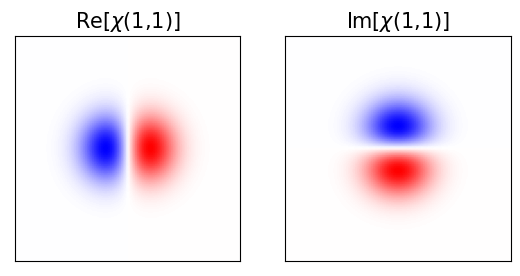

In [4]:
# Plot
fig = plt.figure()

ax = fig.add_subplot(121)
ax.imshow(zs_re, origin='lower',cmap='bwr')
ax.set_title(fr"Re[$\chi$({n},{m})]", fontsize=15)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

ax = fig.add_subplot(122)
ax.imshow(zs_im, origin='lower',cmap='bwr')
ax.set_title(fr"Im[$\chi$({n},{m})]", fontsize=15)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

### 3.2 Multiple 2D Shaplet Function

In [5]:
# Plot multiple basis functions

# Set parameters
max_n = 4
ns = np.linspace(0,max_n,max_n+1, dtype=int)
ms = np.linspace(-np.max(ns), np.max(ns), 2*len(ns)-1, dtype=int)

# Use the same x/y for all plots
n_samples = 100 # Something large for a continuous looking plot
xs = np.linspace(-5,5,n_samples) 
ys = np.linspace(-5,5,n_samples)

offset = np.max(ms) # Used to compute axs index

<Figure size 640x480 with 0 Axes>

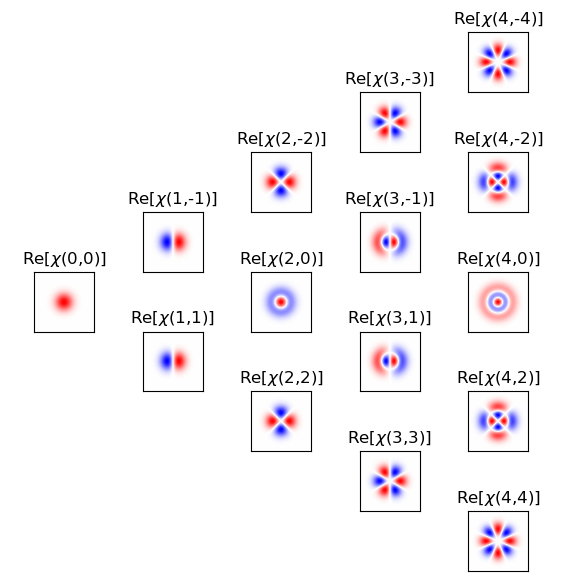

In [6]:
plt.figure()

fig, axs = plt.subplots(len(ms), len(ns), figsize=(7,7))

for n, m in itertools.product(ns, ms):
    n = int(n) # itertools outputs np.int(64)
    m = int(m) # Convert to int

    ax = axs[m+offset][n]
    try:
        zs_re, zs_im = eval_chi_grid(xs, ys, n, m)

        bound = np.max(np.abs(zs_re))
        norm = colors.TwoSlopeNorm(vmin=-bound, 
                                   vcenter=0, 
                                   vmax=bound)

        ax.imshow(zs_re, origin='lower', cmap='bwr', norm=norm)
        ax.set_title(fr"Re[$\chi$({n},{m})]", fontsize=12)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    except:
        ax.axis('off')
        continue

plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()


<Figure size 640x480 with 0 Axes>

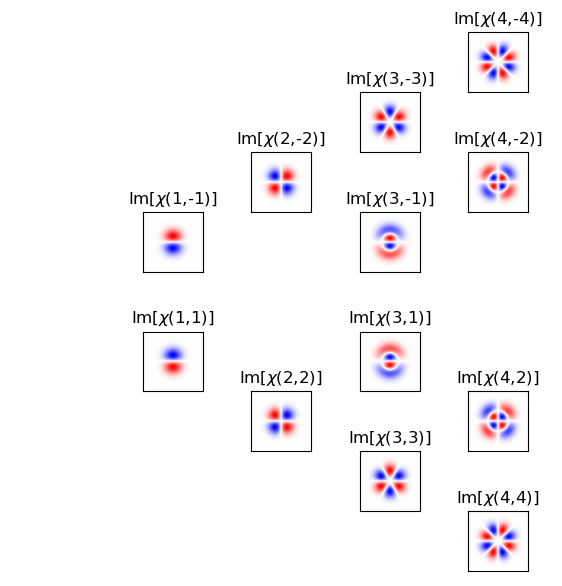

In [7]:
plt.figure()

fig, axs = plt.subplots(len(ms), len(ns), figsize=(7,7))

for n, m in itertools.product(ns, ms):
    n = int(n) # itertools outputs np.int(64)
    m = int(m) # Convert to int

    ax = axs[m+offset][n]
    try:
        zs_re, zs_im = eval_chi_grid(xs, ys, n, m)
        if np.all(zs_im) == 0:
            raise 0
            
        bound = np.max(np.abs(zs_re))
        norm = colors.TwoSlopeNorm(vmin=-bound, 
                                   vcenter=0, 
                                   vmax=bound)
        
        ax.imshow(zs_im, origin='lower', cmap='bwr', norm=norm)
        ax.set_title(fr"Im[$\chi$({n},{m})]", fontsize=12)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    except:
        ax.axis('off')
        continue

plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()
